# Unsupervised Learning

- [Lab 1: Principal Component Analysis](#Lab-1:-Principal-Component-Analysis)
- [Lab 2: K-Means Clustering](#Lab-2:-Clustering)
- [Lab 2: Hierarchical Clustering](#10.5.3-Hierarchical-Clustering)
- [Lab 3: NCI60 Data Example](#Lab-3:-NCI60-Data-Example)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

/var/folders/2c/cd06n1c95mv7lsfybtv2zt1w0000gn/T/ipykernel_56783/2694345165.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## Lab 1: Principal Component Analysis

In [2]:


df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv', index_col=0)
df.head()

#df = pd.read_csv('USArrests.csv', index_col=0)
#df.info()|

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [4]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [3]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

PCA().fit(X).components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [6]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings



,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [7]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


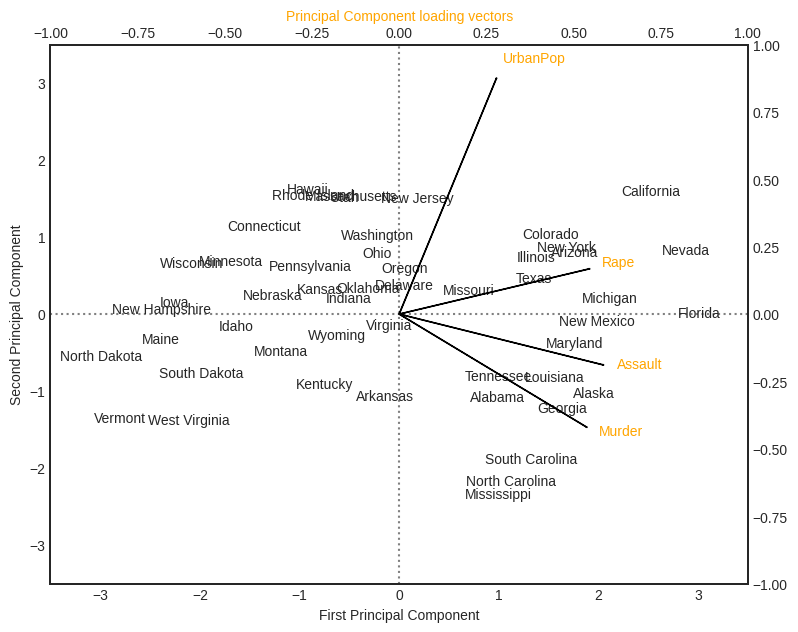

In [8]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

In [ ]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [ ]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

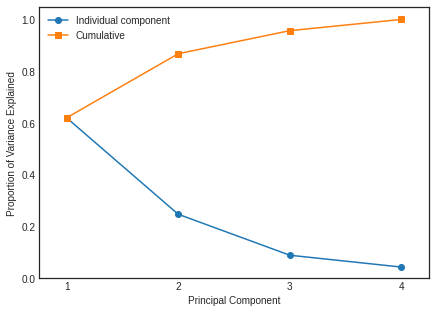

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

## Lab 2: Clustering

### K-Means Clustering

In [5]:
# prep data
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)


#### K = 2

In [6]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [7]:
km1.predict(X)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
km1.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

See plot for K=2 below.

In [9]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km1.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

#Note that original means are zero centered, so you can compare these categories to a mean of zero for all columns in your
#scaled data

# HOW WOULD YOU CATEGORIZE STATES IN EACH CLUSTER?  HOW WERE OBSERVATIONS CATEGORIZED?

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,-0.676758,-0.682747,-0.133061,-0.570376
1,1.015137,1.024120,0.199591,0.855564


####  K = 3

In [10]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [11]:
pd.Series(km2.labels_).value_counts()

0    20
1    17
2    13
Name: count, dtype: int64

In [12]:
km2.cluster_centers_

array([[ 1.01513667e+00,  1.02412028e+00,  1.99591261e-01,
         8.55563863e-01,  1.00000000e+00],
       [-4.51517468e-01, -3.50031767e-01,  4.83666029e-01,
        -2.59750460e-01, -5.55111512e-17],
       [-9.71302806e-01, -1.11783581e+00, -9.39549824e-01,
        -9.76578419e-01,  0.00000000e+00]])

In [13]:
km2.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

In [14]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

79.92170303159772

In [19]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km2.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

#Note that original means are zero centered, so you can compare these categories to a mean of zero for all columns in your
#scaled data

# HOW WOULD YOU CATEGORIZE STATES IN EACH CLUSTER?  HOW WERE OBSERVATIONS CATEGORIZED?

#print groups by index values to see states

X.groupby('cluster').groups

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,1.015137,1.024120,0.199591,0.855564
1,-0.451517,-0.350032,0.483666,-0.259750
2,-0.971303,-1.117836,-0.939550,-0.976578


{0: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas'], 1: ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming'], 2: ['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']}

# 1. Now use K means clustering to generate four categories from this data and then evaluate what the clusters mean

# 2. Can you use the following code to generate four categories using Hierarchical clustering?  Are the categories the same?



In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4,   # note that we select the clusters
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
print(labels)

[2 0 0 2 0 0 1 1 0 2 1 3 0 1 3 1 2 2 3 0 1 0 1 2 0 3 3 0 3 1 0 0 2 3 1 1 0
 1 1 2 3 2 0 1 3 2 0 3 1 2]
